In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

%matplotlib inline

In [53]:

shots = pd.read_csv("../shotcharts-2018-19.csv")
pbp = pd.read_csv("../pbp-2018-19.csv")

In [54]:
pbp.tail()

,Unnamed: 0,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION
235443,433,21800496,644,8,0,4,11:49 PM,0:38,SUB: Caldwell-Pope FOR Zubac,NaN,NaN,NaN,NaN,4.0,1627826,Ivica Zubac,1.610613e+09,Los Angeles,Lakers,LAL,4,203484,Kentavious Caldwell-Pope,1.610613e+09,Los Angeles,Lakers,LAL,0,0,NaN,NaN,NaN,NaN,NaN
235444,434,21800496,646,1,80,4,11:50 PM,0:25,NaN,NaN,Jackson Jr. 27' 3PT Step Back Jump Shot (27 PTS),107 - 99,-8,5.0,1628991,Jaren Jackson Jr.,1.610613e+09,Memphis,Grizzlies,MEM,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
235445,435,21800496,647,2,6,4,11:50 PM,0:19,MISS James 2' Driving Layup,NaN,Anderson BLOCK (1 BLK),NaN,NaN,4.0,2544,LeBron James,1.610613e+09,Los Angeles,Lakers,LAL,0,0,NaN,NaN,NaN,NaN,NaN,5,203937,Kyle Anderson,1.610613e+09,Memphis,Grizzlies,MEM
235446,436,21800496,649,4,0,4,11:50 PM,0:16,NaN,NaN,Jackson Jr. REBOUND (Off:4 Def:5),NaN,NaN,5.0,1628991,Jaren Jackson Jr.,1.610613e+09,Memphis,Grizzlies,MEM,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
235447,437,21800496,650,13,0,4,11:51 PM,0:00,NaN,NaN,NaN,107 - 99,-8,0.0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [55]:
shots.head()

,Unnamed: 0,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,0,Shot Chart Detail,21800001,114,201143,Al Horford,1610612738,Boston Celtics,1,3,47,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,24,-1,1,1,20181016,BOS,PHI
1,1,Shot Chart Detail,21800001,271,201143,Al Horford,1610612738,Boston Celtics,2,5,7,Made Shot,Alley Oop Layup shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-2,11,1,1,20181016,BOS,PHI
2,2,Shot Chart Detail,21800001,308,201143,Al Horford,1610612738,Boston Celtics,2,2,24,Made Shot,Driving Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-9,7,1,1,20181016,BOS,PHI
3,3,Shot Chart Detail,21800001,353,201143,Al Horford,1610612738,Boston Celtics,3,11,5,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,12,-114,53,1,1,20181016,BOS,PHI
4,4,Shot Chart Detail,21800001,580,201143,Al Horford,1610612738,Boston Celtics,4,7,24,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,40,57,1,0,20181016,BOS,PHI


### Filter pbp data for OREB
1. Start by shifting `HOMEDESCRIPTION` and `VISITORDESCRIPTION` to get the next play and create two new columns, `next_Home_desc` and `next_Visitor_desc`
2. Create a new column `creates_OREB` and filter for current description contains `MISS` and next description contains `REBOUND`. 1 if true and 0 if false so that can easily sum to get counts later.
3. Get `three_next`, `four_next`, etc... to attempt to gather points off OREB for shots and FT

In [56]:
pbp['next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-1)
pbp['next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-1)

pbp['two_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-2)
pbp['two_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-2)
pbp['two_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-2)

pbp['three_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-3)
pbp['three_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-3)
pbp['three_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-3)

pbp['four_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-4)
pbp['four_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-4)
pbp['four_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-4)

pbp['five_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-5)
pbp['five_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-5)
pbp['five_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-5)

pbp['six_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-6)
pbp['six_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-6)
pbp['six_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-6)

pbp['seven_next_play_event_type'] = pbp['EVENTMSGTYPE'].shift(-7)
pbp['seven_next_Home_desc'] = pbp['HOMEDESCRIPTION'].shift(-7)
pbp['seven_next_Visitor_desc'] = pbp['VISITORDESCRIPTION'].shift(-7)

Conditionally set OREB, OREB outcomes type, and points from OREB 

In [57]:
pbp['creates_OREB'] = np.where(((pbp.next_Home_desc.str.contains('REBOUND'))&(pbp.HOMEDESCRIPTION.str.contains('MISS'))) |
                                ((pbp.next_Visitor_desc.str.contains('REBOUND'))&(pbp.VISITORDESCRIPTION.str.contains('MISS')))
                                 ,
                                1,
                                0
                                )

pbp['OREB_outcome'] = np.where((pbp.creates_OREB == 1)&(pbp.two_next_play_event_type == 1),
                               1,
                               np.where((pbp.creates_OREB == 1)&(pbp.two_next_play_event_type == 6),
                                        6,
                                        0))
pbp['FT1'] = np.where(pbp.OREB_outcome == 6,
                     np.where(((pbp.three_next_play_event_type == 3) & np.logical_not(pbp.three_next_Home_desc.str.contains('MISS')) 
                               & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                              ((pbp.three_next_play_event_type == 3) & np.logical_not(pbp.three_next_Visitor_desc.str.contains('MISS'))
                               & (pd.notnull(pbp.VISITORDESCRIPTION))),
                             1,
                             0),
                      0
                      
                     )

pbp['FT2'] = np.where(pbp.OREB_outcome == 6,
                     np.where(((pbp.four_next_play_event_type == 3) & np.logical_not(pbp.four_next_Home_desc.str.contains('MISS')) 
                               & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                              ((pbp.four_next_play_event_type == 3) & np.logical_not(pbp.four_next_Visitor_desc.str.contains('MISS'))
                               & (pd.notnull(pbp.VISITORDESCRIPTION))),
                             1,
                             0),
                      0
                      
                     )
pbp['FT3'] = np.where(pbp.OREB_outcome == 6,
                     np.where(((pbp.five_next_play_event_type == 3) & np.logical_not(pbp.five_next_Home_desc.str.contains('MISS')) 
                               & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                              ((pbp.five_next_play_event_type == 3) & np.logical_not(pbp.five_next_Visitor_desc.str.contains('MISS'))
                               & (pd.notnull(pbp.VISITORDESCRIPTION))),
                             1,
                             0),
                      0
                      
                     )

pbp['FT4'] = np.where(pbp.OREB_outcome == 6,
                     np.where(((pbp.six_next_play_event_type == 3) & np.logical_not(pbp.six_next_Home_desc.str.contains('MISS')) 
                               & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                              ((pbp.six_next_play_event_type == 3) & np.logical_not(pbp.six_next_Visitor_desc.str.contains('MISS'))
                               & (pd.notnull(pbp.VISITORDESCRIPTION))),
                             1,
                             0),
                      0
                      
                     )
pbp['FT5'] = np.where(pbp.OREB_outcome == 6,
                     np.where(((pbp.seven_next_play_event_type == 3) & np.logical_not(pbp.seven_next_Home_desc.str.contains('MISS')) 
                               & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                              ((pbp.seven_next_play_event_type == 3) & np.logical_not(pbp.seven_next_Visitor_desc.str.contains('MISS'))
                               & (pd.notnull(pbp.VISITORDESCRIPTION))),
                             1,
                             0),
                      0
                      
                     )

pbp['FT_PTS'] = pbp.FT1 + pbp.FT2 + pbp.FT3 + pbp.FT4 + pbp.FT5
pbp['two_next_shot_value'] = np.where((pbp.OREB_outcome == 1),
                                       np.where(((pbp.two_next_Home_desc.str.contains('3PT')) & (pd.notnull(pbp.HOMEDESCRIPTION))) |
                                                ((pbp.two_next_Visitor_desc.str.contains('3PT'))& (pd.notnull(pbp.VISITORDESCRIPTION))),
                                                  3,
                                                  2),
                                      pbp.FT_PTS)
            


In [58]:
pbp

,Unnamed: 0,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,next_Home_desc,next_Visitor_desc,two_next_play_event_type,two_next_Home_desc,two_next_Visitor_desc,three_next_play_event_type,three_next_Home_desc,three_next_Visitor_desc,four_next_play_event_type,four_next_Home_desc,four_next_Visitor_desc,five_next_play_event_type,five_next_Home_desc,five_next_Visitor_desc,six_next_play_event_type,six_next_Home_desc,six_next_Visitor_desc,seven_next_play_event_type,seven_next_Home_desc,seven_next_Visitor_desc,creates_OREB,OREB_outcome,FT1,FT2,FT3,FT4,FT5,FT_PTS,two_next_shot_value
0,0,21800001,4,10,0,1,8:03 PM,12:00,Jump Ball Horford vs. Embiid: Tip to Simmons,NaN,NaN,NaN,NaN,4.0,201143,Al Horford,1.610613e+09,Boston,Celtics,BOS,5,203954,Joel Embiid,1.610613e+09,Philadelphia,76ers,PHI,5,1627732,Ben Simmons,1.610613e+09,Philadelphia,76ers,PHI,NaN,MISS Covington 27' 3PT Jump Shot,4.0,CELTICS Rebound,NaN,2.0,MISS Tatum 25' 3PT Jump Shot,NaN,4.0,NaN,Saric REBOUND (Off:0 Def:1),5.0,Hayward STEAL (1 STL),Simmons Bad Pass Turnover (P1.T1),2.0,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),0,0,0,0,0,0,0,0,0
1,1,21800001,7,2,1,1,8:03 PM,11:40,NaN,NaN,MISS Covington 27' 3PT Jump Shot,NaN,NaN,5.0,203496,Robert Covington,1.610613e+09,Philadelphia,76ers,PHI,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,CELTICS Rebound,NaN,2.0,MISS Tatum 25' 3PT Jump Shot,NaN,4.0,NaN,Saric REBOUND (Off:0 Def:1),5.0,Hayward STEAL (1 STL),Simmons Bad Pass Turnover (P1.T1),2.0,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),1.0,NaN,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),0,0,0,0,0,0,0,0,0
2,2,21800001,8,4,0,1,8:04 PM,11:40,CELTICS Rebound,NaN,NaN,NaN,NaN,2.0,1610612738,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,MISS Tatum 25' 3PT Jump Shot,NaN,4.0,NaN,Saric REBOUND (Off:0 Def:1),5.0,Hayward STEAL (1 STL),Simmons Bad Pass Turnover (P1.T1),2.0,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),1.0,NaN,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),2.0,MISS Tatum 5' Driving Layup,NaN,0,0,0,0,0,0,0,0,0
3,3,21800001,10,2,1,1,8:04 PM,11:15,MISS Tatum 25' 3PT Jump Shot,NaN,NaN,NaN,NaN,4.0,1628369,Jayson Tatum,1.610613e+09,Boston,Celtics,BOS,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Saric REBOUND (Off:0 Def:1),5.0,Hayward STEAL (1 STL),Simmons Bad Pass Turnover (P1.T1),2.0,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),1.0,NaN,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),2.0,MISS Tatum 5' Driving Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:2),0,0,0,0,0,0,0,0,0
4,4,21800001,11,4,0,1,8:04 PM,11:13,NaN,NaN,Saric REBOUND (Off:0 Def:1),NaN,NaN,5.0,203967,Dario Saric,1.610613e+09,Philadelphia,76ers,PHI,0,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Hayward STEAL (1 STL),Simmons Bad Pass Turnover (P1.T1),2.0,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),1.0,NaN,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),2.0,MISS Tatum 5' Driving Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:2),2.0,NaN,MISS Saric 26' 3PT Pullup Jump Shot,0,0,0,0,0,0,0,0,0
5,5,21800001,12,5,1,1,8:04 PM,11:08,Hayward STEAL (1 STL),NaN,Simmons Bad Pass Turnover (P1.T1),NaN,NaN,5.0,1627732,Ben Simmons,1.610613e+09,Philadelphia,76ers,PHI,4,202330,Gordon Hayward,1.610613e+09,Boston,Celtics,BOS,0,0,NaN,NaN,NaN,NaN,NaN,MISS Brown 2' Running Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 Def:1),1.0,NaN,Embiid 1' Running Layup (2 PTS) (Simmons 1 AST),2.0,MISS Tatum 5' Driving Layup,NaN,4.0,NaN,Simmons REBOUND (Off:0 De

In [59]:
# per stats from https://stats.nba.com/players/misc/?sort=player_NAME&dir=-1&Season=2018-19&SeasonType=Regular%20Season&PerMode=Totals&DateTo=12%2F24%2F2018
# actual 2nd chance points = 13050
print("My 2nd chance points", pbp.two_next_shot_value.sum())
pbp.two_next_shot_value.sum()/13050

My 2nd chance points 10318


0.7906513409961686

In [60]:
#  per stats from https://stats.nba.com/players/traditional/?sort=OREB&dir=-1&Season=2018-19&SeasonType=Regular%20Season&PerMode=Totals&DateTo=12%2F24%2F2018
# actual total OREB = 10273
print(pbp.creates_OREB.sum())
pbp.creates_OREB.sum()/10273

10196


0.9925046237710503

### Merge shotcharts and pbp data
Merge shots with pbp on `GAME_ID` and `EVENTNUM`

In [61]:
shotsPBP = shots.merge(pbp, left_on=["GAME_ID","GAME_EVENT_ID"], right_on=["GAME_ID","EVENTNUM"])


In [62]:
shotsPBP['combined_zone']=shotsPBP['SHOT_ZONE_BASIC']+'_'+shotsPBP['SHOT_ZONE_AREA']+'_'+shotsPBP['SHOT_ZONE_RANGE']+'_'+shotsPBP['SHOT_TYPE']
shotsPBP = shotsPBP[shotsPBP.SHOT_ZONE_RANGE != "Back Court Shot"]
uniquezones = shotsPBP.combined_zone.unique()
uniquezones.sort()
print(uniquezones)
print(uniquezones.shape)

['Above the Break 3_Center(C)_24+ ft._2PT Field Goal'
 'Above the Break 3_Center(C)_24+ ft._3PT Field Goal'
 'Above the Break 3_Left Side Center(LC)_24+ ft._2PT Field Goal'
 'Above the Break 3_Left Side Center(LC)_24+ ft._3PT Field Goal'
 'Above the Break 3_Right Side Center(RC)_24+ ft._2PT Field Goal'
 'Above the Break 3_Right Side Center(RC)_24+ ft._3PT Field Goal'
 'In The Paint (Non-RA)_Center(C)_8-16 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Center(C)_Less Than 8 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Left Side(L)_8-16 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Right Side(R)_8-16 ft._2PT Field Goal'
 'Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal'
 'Mid-Range_Center(C)_16-24 ft._2PT Field Goal'
 'Mid-Range_Center(C)_8-16 ft._2PT Field Goal'
 'Mid-Range_Left Side Center(LC)_16-24 ft._2PT Field Goal'
 'Mid-Range_Left Side Center(LC)_16-24 ft._3PT Field Goal'
 'Mid-Range_Left Side(L)_16-24 ft._2PT Field Goal'
 'Mid-Range_Left Side(L)_16-24 ft._3PT Field Goal'
 'Mid-Range_

Clean up weird shot zones such as midrange 3PT and ATB 2PT

In [63]:


shotsPBP.loc[shotsPBP.combined_zone == 'Above the Break 3_Center(C)_24+ ft._2PT Field Goal', "combined_zone"] = 'Mid-Range_Left Side(L)_16-24 ft._2PT Field Goal'
shotsPBP.loc[shotsPBP.combined_zone == 'Above the Break 3_Left Side Center(LC)_24+ ft._2PT Field Goal', "combined_zone"] = 'Mid-Range_Left Side Center(LC)_16-24 ft._2PT Field Goal'

shotsPBP.loc[shotsPBP.combined_zone == 'Above the Break 3_Right Side Center(RC)_24+ ft._2PT Field Goal', "combined_zone"] = 'Mid-Range_Right Side Center(RC)_16-24 ft._2PT Field Goal'
shotsPBP.loc[shotsPBP.combined_zone == 'Mid-Range_Left Side Center(LC)_16-24 ft._3PT Field Goal', "combined_zone"] = 'Above the Break 3_Left Side Center(LC)_24+ ft._3PT Field Goal'
shotsPBP.loc[shotsPBP.combined_zone == 'Mid-Range_Left Side(L)_16-24 ft._3PT Field Goal', "combined_zone"] = 'Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal'
shotsPBP.loc[shotsPBP.combined_zone == 'Mid-Range_Right Side Center(RC)_16-24 ft._3PT Field Goal', "combined_zone"] = 'Above the Break 3_Right Side Center(RC)_24+ ft._3PT Field Goal'
shotsPBP.loc[shotsPBP.combined_zone == 'Mid-Range_Right Side(R)_16-24 ft._3PT Field Goal', "combined_zone"] = 'Right Corner 3_Right Side(R)_24+ ft._3PT Field Goal'



In [64]:
uniquezones = shotsPBP.combined_zone.unique()
uniquezones.sort()
print(uniquezones)
print(uniquezones.shape)

['Above the Break 3_Center(C)_24+ ft._3PT Field Goal'
 'Above the Break 3_Left Side Center(LC)_24+ ft._3PT Field Goal'
 'Above the Break 3_Right Side Center(RC)_24+ ft._3PT Field Goal'
 'In The Paint (Non-RA)_Center(C)_8-16 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Center(C)_Less Than 8 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Left Side(L)_8-16 ft._2PT Field Goal'
 'In The Paint (Non-RA)_Right Side(R)_8-16 ft._2PT Field Goal'
 'Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal'
 'Mid-Range_Center(C)_16-24 ft._2PT Field Goal'
 'Mid-Range_Center(C)_8-16 ft._2PT Field Goal'
 'Mid-Range_Left Side Center(LC)_16-24 ft._2PT Field Goal'
 'Mid-Range_Left Side(L)_16-24 ft._2PT Field Goal'
 'Mid-Range_Left Side(L)_8-16 ft._2PT Field Goal'
 'Mid-Range_Right Side Center(RC)_16-24 ft._2PT Field Goal'
 'Mid-Range_Right Side(R)_16-24 ft._2PT Field Goal'
 'Mid-Range_Right Side(R)_8-16 ft._2PT Field Goal'
 'Restricted Area_Center(C)_Less Than 8 ft._2PT Field Goal'
 'Right Corner 3_Right Side(R)_24+

### Calculate xpps for each zone
1. Sum `SHOT_ATTEMPTED_FLAG` for each zone to get FGA
2. Sum `SHOT_MADE_FLAG` for each zone to get FGM
3. Calculate FGM/FGA for each zone
1. Sum `creates_OREB` for each zone
2. Sum misses for each zone (FGA - FGM)
3. Calculate OREB%
4. Calculate `pts_per_OREB`
5. Calculate `xpps = ` $FG\% \times shot\_value + (1-FG\%) \times OREB\% \times pts\_per\_OREB$

In [78]:
league_by_zone = shotsPBP.groupby(by="combined_zone", as_index=False).agg({"SHOT_TYPE":"max",
                                                                           "SHOT_MADE_FLAG":"sum",
                                                                            "SHOT_ATTEMPTED_FLAG": "sum",
                                                                           "creates_OREB": "sum",
                                                                                    "two_next_shot_value":"sum"})

league_by_zone.rename(columns={"SHOT_ATTEMPTED_FLAG": "FGA",
                               "creates_OREB": "OREB",
                        "SHOT_MADE_FLAG":"FGM",
                            "two_next_shot_value":"2nd_Chance_Pts"}, inplace=True)
league_by_zone.fillna(0, inplace=True)
league_by_zone["FG%"] = league_by_zone.FGM/league_by_zone.FGA
league_by_zone["MISSES"] = league_by_zone.FGA - league_by_zone.FGM
league_by_zone["OREB%"] = league_by_zone.OREB/league_by_zone.MISSES
league_by_zone["shot_value"] = np.where(league_by_zone.SHOT_TYPE.str.contains('2PT') ,2,3)
league_by_zone["pts_per_OREB"] = league_by_zone["2nd_Chance_Pts"]/league_by_zone["OREB"]
league_by_zone.fillna(0, inplace=True)


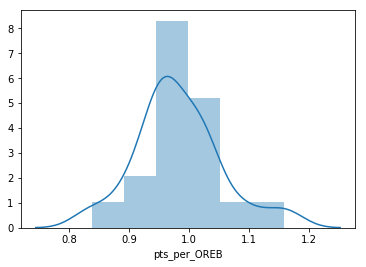

In [79]:
sns.distplot(league_by_zone.pts_per_OREB)

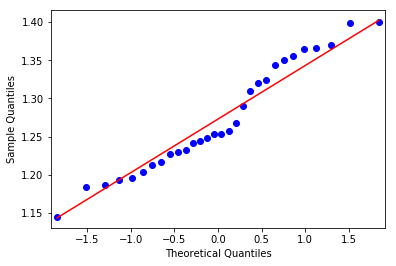

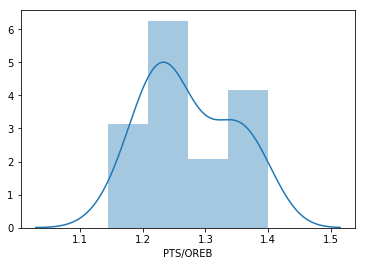

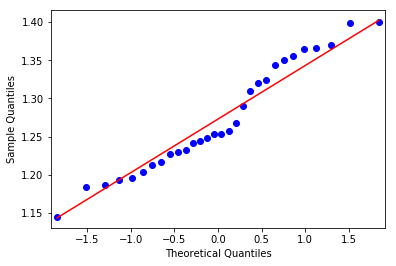

In [80]:
nbaREB = pd.read_csv('../pts_per_OREB-NBA.csv')
nbaREB.dropna(inplace=True)
sns.distplot(nbaREB['PTS/OREB'])

from statsmodels.graphics.gofplots import qqplot

qqplot(nbaREB['PTS/OREB'], line='s')


In [81]:
from scipy.stats import shapiro

stat, p = shapiro(nbaREB['PTS/OREB'])
print(stat, p)

0.9462716579437256 0.13423529267311096


In [82]:
calcMeanPtsOREB= player_by_zone['pts_per_OREB'].mean()
calcStdPtsOREB= player_by_zone['pts_per_OREB'].std()
nbaMeanOREB_PTS= nbaREB['PTS/OREB'].mean()
nbaStdOREB_PTS= nbaREB['PTS/OREB'].std()


In [83]:
league_by_zone['z_pts_per_OREB'] = (league_by_zone.pts_per_OREB - calcMeanPtsOREB)/calcStdPtsOREB

league_by_zone['scaled_pts_per_OREB'] = league_by_zone['z_pts_per_OREB']* nbaStdOREB_PTS + nbaMeanOREB_PTS
league_by_zone['xpps'] = league_by_zone["FG%"] * league_by_zone.shot_value + (1- league_by_zone['FG%'])*league_by_zone["OREB%"]*league_by_zone.scaled_pts_per_OREB

league_by_zone.sort_values("xpps", ascending=False)

,combined_zone,SHOT_TYPE,FGM,FGA,OREB,2nd_Chance_Pts,FG%,MISSES,OREB%,shot_value,pts_per_OREB,z_pts_per_OREB,scaled_pts_per_OREB,xpps
16,Restricted Area_Center(C)_Less Than 8 ft._2PT ...,2PT Field Goal,18228,29052,3139,3428,0.627427,10824,0.290004,2,1.092068,0.725005,1.324638,1.397977
7,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,1374,3541,405,385,0.388026,2167,0.186894,3,0.950617,0.547194,1.311984,1.314135
17,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,1256,3334,405,421,0.376725,2078,0.194899,3,1.039506,0.658933,1.319936,1.290514
2,Above the Break 3_Right Side Center(RC)_24+ ft...,3PT Field Goal,2977,8476,986,943,0.351227,5499,0.179305,3,0.956389,0.554450,1.312500,1.206362
1,Above the Break 3_Left Side Center(LC)_24+ ft....,3PT Field Goal,3125,8968,1008,997,0.348461,5843,0.172514,3,0.989087,0.595553,1.315425,1.193237
0,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,2099,6260,627,594,0.335304,4161,0.150685,3,0.947368,0.543110,1.311693,1.137289
3,In The Paint (Non-RA)_Center(C)_8-16 ft._2PT F...,2PT Field Goal,1905,4578,582,565,0.416121,2673,0.217733,2,0.970790,0.572553,1.313788,0.999263
9,Mid-Range_Center(C)_8-16 ft._2PT Field Goal,2PT Field Goal,412,966,97,87,0.426501,554,0.175090,2,0.896907,0.479678,1.307179,0.984261
4,In The Paint (Non-RA)_Center(C)_Less Than 8 ft...,2PT Field Goal,2953,7683,1248,1268,0.384355,4730,0.263848,2,1.016026,0.629416,1.317835,0.982775
15,Mid-Range_Right Side(R)_8-16 ft._2PT Field Goal,2PT Field Goal,920,2189,227,216,0.420283,1269,0.178881,2,0.951542,0.548357,1.312066,0.976628


In [84]:
team_by_zone = shotsPBP.groupby(by=["TEAM_ID","combined_zone"], as_index=False).agg({"SHOT_TYPE":"max",
                                                                                     "TEAM_NAME": "max",
                                                                           "SHOT_MADE_FLAG":"sum",
                                                                            "SHOT_ATTEMPTED_FLAG": "sum",
                                                                           "creates_OREB": "sum",
                                                                                    "two_next_shot_value":"sum"})

team_by_zone.rename(columns={"SHOT_ATTEMPTED_FLAG": "FGA",
                               "creates_OREB": "OREB",
                        "SHOT_MADE_FLAG":"FGM",
                            "two_next_shot_value":"2nd_Chance_Pts"}, inplace=True)
team_by_zone.fillna(0, inplace=True)
team_by_zone["FG%"] = team_by_zone.FGM/team_by_zone.FGA
team_by_zone["MISSES"] = team_by_zone.FGA - team_by_zone.FGM
team_by_zone["OREB%"] = team_by_zone.OREB/team_by_zone.MISSES
team_by_zone["shot_value"] = np.where(team_by_zone.SHOT_TYPE.str.contains('2PT') ,2,3)
team_by_zone["pts_per_OREB"] = team_by_zone["2nd_Chance_Pts"]/team_by_zone["OREB"]
team_by_zone.fillna(0, inplace=True)
team_by_zone['xpps'] = team_by_zone["FG%"] * team_by_zone.shot_value + (1- team_by_zone['FG%'])*team_by_zone["OREB%"]*team_by_zone.pts_per_OREB

team_by_zone.head(18)

,TEAM_ID,combined_zone,SHOT_TYPE,TEAM_NAME,FGM,FGA,OREB,2nd_Chance_Pts,FG%,MISSES,OREB%,shot_value,pts_per_OREB,xpps
0,1610612737,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Atlanta Hawks,75,258,31,29,0.290698,183,0.169399,3,0.935484,0.984496
1,1610612737,Above the Break 3_Left Side Center(LC)_24+ ft....,3PT Field Goal,Atlanta Hawks,81,248,26,22,0.326613,167,0.155689,3,0.846154,1.068548
2,1610612737,Above the Break 3_Right Side Center(RC)_24+ ft...,3PT Field Goal,Atlanta Hawks,88,280,29,30,0.314286,192,0.151042,3,1.034483,1.050000
3,1610612737,In The Paint (Non-RA)_Center(C)_8-16 ft._2PT F...,2PT Field Goal,Atlanta Hawks,62,145,13,8,0.427586,83,0.156627,2,0.615385,0.910345
4,1610612737,In The Paint (Non-RA)_Center(C)_Less Than 8 ft...,2PT Field Goal,Atlanta Hawks,64,196,36,37,0.326531,132,0.272727,2,1.027778,0.841837
5,1610612737,In The Paint (Non-RA)_Left Side(L)_8-16 ft._2P...,2PT Field Goal,Atlanta Hawks,4,19,3,2,0.210526,15,0.200000,2,0.666667,0.526316
6,1610612737,In The Paint (Non-RA)_Right Side(R)_8-16 ft._2...,2PT Field Goal,Atlanta Hawks,8,26,5,2,0.307692,18,0.277778,2,0.400000,0.692308
7,1610612737,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Atlanta Hawks,53,148,15,14,0.358108,95,0.157895,3,0.933333,1.168919
8,1610612737,Mid-Range_Center(C)_16-24 ft._2PT Field Goal,2PT Field Goal,Atlanta Hawks,20,43,6,4,0.465116,23,0.260870,2,0.666667,1.023256
9,1610612737,Mid-Range_Center(C)_8-16 ft._2PT Field Goal,2PT Field Goal,Atlanta Hawks,7,21,1,2,0.333333,14,0.071429,2,2.000000,0.761905


In [85]:
team_by_zone['z_pts_per_OREB'] = (team_by_zone.pts_per_OREB - calcMeanPtsOREB)/calcStdPtsOREB

team_by_zone['scaled_pts_per_OREB'] = team_by_zone['z_pts_per_OREB']* nbaStdOREB_PTS + nbaMeanOREB_PTS
team_by_zone['xpps'] = team_by_zone["FG%"] * team_by_zone.shot_value + (1- team_by_zone['FG%'])*team_by_zone["OREB%"]*team_by_zone.scaled_pts_per_OREB

team_by_zone.sort_values("xpps", ascending=False)

,TEAM_ID,combined_zone,SHOT_TYPE,TEAM_NAME,FGM,FGA,OREB,2nd_Chance_Pts,FG%,MISSES,OREB%,shot_value,pts_per_OREB,xpps,z_pts_per_OREB,scaled_pts_per_OREB
158,1610612745,Mid-Range_Right Side(R)_16-24 ft._2PT Field Goal,2PT Field Goal,Houston Rockets,6,7,0,0,0.857143,1,0.000000,2,0.000000,1.714286,-0.647785,1.226939
539,1610612766,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,Charlotte Hornets,50,99,11,8,0.505051,49,0.224490,3,0.727273,1.658707,0.266438,1.292003
331,1610612755,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Philadelphia 76ers,30,64,8,9,0.468750,34,0.235294,3,1.125000,1.572198,0.766403,1.327584
133,1610612744,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Golden State Warriors,52,112,15,15,0.464286,60,0.250000,3,1.000000,1.569161,0.609271,1.316402
398,1610612759,Above the Break 3_Right Side Center(RC)_24+ ft...,3PT Field Goal,San Antonio Spurs,101,217,23,19,0.465438,116,0.198276,3,0.826087,1.534191,0.390653,1.300843
179,1610612746,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,LA Clippers,30,71,13,15,0.422535,41,0.317073,3,1.153846,1.511157,0.802665,1.330165
122,1610612743,Mid-Range_Right Side(R)_16-24 ft._2PT Field Goal,2PT Field Goal,Denver Nuggets,12,17,1,0,0.705882,5,0.200000,2,0.000000,1.483938,-0.647785,1.226939
232,1610612749,Restricted Area_Center(C)_Less Than 8 ft._2PT ...,2PT Field Goal,Milwaukee Bucks,758,1113,94,97,0.681042,355,0.264789,2,1.031915,1.473504,0.649390,1.319257
413,1610612759,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,San Antonio Spurs,39,84,5,2,0.464286,45,0.111111,3,0.400000,1.468019,-0.144963,1.262724
340,1610612755,Restricted Area_Center(C)_Less Than 8 ft._2PT ...,2PT Field Goal,Philadelphia 76ers,618,924,87,89,0.668831,306,0.284314,2,1.022989,1.461803,0.638169,1.318458


In [76]:
# player_by_zone.groupby('combined_zone')['scaled_pts_per_OREB'].mean()

combined_zone
Above the Break 3_Center(C)_24+ ft._3PT Field Goal                0.878454
Above the Break 3_Left Side Center(LC)_24+ ft._3PT Field Goal     1.027109
Above the Break 3_Right Side Center(RC)_24+ ft._3PT Field Goal    0.934766
In The Paint (Non-RA)_Center(C)_8-16 ft._2PT Field Goal           0.895135
In The Paint (Non-RA)_Center(C)_Less Than 8 ft._2PT Field Goal    1.063251
In The Paint (Non-RA)_Left Side(L)_8-16 ft._2PT Field Goal        0.684975
In The Paint (Non-RA)_Right Side(R)_8-16 ft._2PT Field Goal       0.641827
Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal                 0.886305
Mid-Range_Center(C)_16-24 ft._2PT Field Goal                      0.642760
Mid-Range_Center(C)_8-16 ft._2PT Field Goal                       0.563683
Mid-Range_Left Side Center(LC)_16-24 ft._2PT Field Goal           0.638678
Mid-Range_Left Side(L)_16-24 ft._2PT Field Goal                   0.577437
Mid-Range_Left Side(L)_8-16 ft._2PT Field Goal                    0.719010
Mid-Range_R

In [86]:
player_by_zone = shotsPBP.groupby(by=["PLAYER_NAME","combined_zone"], as_index=False).agg({"SHOT_TYPE":"max",
                                                                                           "TEAM_NAME": "max",
                                                                                           "TEAM_ID": "max",
                                                                                           "PLAYER_ID": "max",
                                                                           "SHOT_MADE_FLAG":"sum",
                                                                            "SHOT_ATTEMPTED_FLAG": "sum",
                                                                           "creates_OREB": "sum",
                                                                                          "two_next_shot_value":"sum"})

player_by_zone.rename(columns={"SHOT_ATTEMPTED_FLAG": "FGA",
                               "creates_OREB": "OREB",
                        "SHOT_MADE_FLAG":"FGM",
                            "two_next_shot_value":"2nd_Chance_Pts"}, inplace=True)
player_by_zone.fillna(0, inplace=True)
player_by_zone["FG%"] = player_by_zone.FGM/player_by_zone.FGA
player_by_zone["MISSES"] = player_by_zone.FGA - player_by_zone.FGM
player_by_zone["OREB%"] = player_by_zone.OREB/player_by_zone.MISSES
player_by_zone["shot_value"] = np.where(player_by_zone.SHOT_TYPE.str.contains('2PT') ,2,3)
player_by_zone["pts_per_OREB"] = player_by_zone["2nd_Chance_Pts"]/player_by_zone["OREB"]
player_by_zone.fillna(0, inplace=True)


In [87]:
player_by_zone['z_pts_per_OREB'] = (player_by_zone.pts_per_OREB - calcMeanPtsOREB)/calcStdPtsOREB

player_by_zone['scaled_pts_per_OREB'] = player_by_zone['z_pts_per_OREB']* nbaStdOREB_PTS + nbaMeanOREB_PTS
player_by_zone['xpps'] = player_by_zone["FG%"] * player_by_zone.shot_value + (1- player_by_zone['FG%'])*player_by_zone["OREB%"]*player_by_zone.scaled_pts_per_OREB

player_by_zone.sort_values("xpps", ascending=False)

,PLAYER_NAME,combined_zone,SHOT_TYPE,TEAM_NAME,TEAM_ID,PLAYER_ID,FGM,FGA,OREB,2nd_Chance_Pts,FG%,MISSES,OREB%,shot_value,pts_per_OREB,z_pts_per_OREB,scaled_pts_per_OREB,xpps
4141,Michael Kidd-Gilchrist,Above the Break 3_Left Side Center(LC)_24+ ft....,3PT Field Goal,Charlotte Hornets,1610612766,203077,1,1,0,0,1.0,0,0.0,3,0.0,-0.647785,1.226939,3.0
173,Amir Johnson,Above the Break 3_Left Side Center(LC)_24+ ft....,3PT Field Goal,Philadelphia 76ers,1610612755,101161,2,2,0,0,1.0,0,0.0,3,0.0,-0.647785,1.226939,3.0
2062,Guerschon Yabusele,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Boston Celtics,1610612738,1627824,1,1,0,0,1.0,0,0.0,3,0.0,-0.647785,1.226939,3.0
5699,Tyler Lydon,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,Denver Nuggets,1610612743,1628399,1,1,0,0,1.0,0,0.0,3,0.0,-0.647785,1.226939,3.0
1543,Dwayne Bacon,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,Charlotte Hornets,1610612766,1628407,1,1,0,0,1.0,0,0.0,3,0.0,-0.647785,1.226939,3.0
5372,Thabo Sefolosha,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Utah Jazz,1610612762,200757,1,1,0,0,1.0,0,0.0,3,0.0,-0.647785,1.226939,3.0
4679,Rajon Rondo,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Los Angeles Lakers,1610612747,200765,2,2,0,0,1.0,0,0.0,3,0.0,-0.647785,1.226939,3.0
5921,Willy Hernangomez,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,Charlotte Hornets,1610612766,1626195,2,2,0,0,1.0,0,0.0,3,0.0,-0.647785,1.226939,3.0
2918,Jonas Valanciunas,Right Corner 3_Right Side(R)_24+ ft._3PT Field...,3PT Field Goal,Toronto Raptors,1610612761,202685,1,1,0,0,1.0,0,0.0,3,0.0,-0.647785,1.226939,3.0
1897,Gary Trent Jr.,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Portland Trail Blazers,1610612757,1629018,2,2,0,0,1.0,0,0.0,3,0.0,-0.647785,1.226939,3.0


In [88]:
player_by_zone[player_by_zone.PLAYER_NAME == "Stephen Curry"]

,PLAYER_NAME,combined_zone,SHOT_TYPE,TEAM_NAME,TEAM_ID,PLAYER_ID,FGM,FGA,OREB,2nd_Chance_Pts,FG%,MISSES,OREB%,shot_value,pts_per_OREB,z_pts_per_OREB,scaled_pts_per_OREB,xpps
5191,Stephen Curry,Above the Break 3_Center(C)_24+ ft._3PT Field ...,3PT Field Goal,Golden State Warriors,1610612744,201939,25,53,4,1,0.471698,28,0.142857,3,0.250000,-0.333521,1.249305,1.509381
5192,Stephen Curry,Above the Break 3_Left Side Center(LC)_24+ ft....,3PT Field Goal,Golden State Warriors,1610612744,201939,41,81,4,5,0.506173,40,0.100000,3,1.250000,0.923535,1.338767,1.584630
5193,Stephen Curry,Above the Break 3_Right Side Center(RC)_24+ ft...,3PT Field Goal,Golden State Warriors,1610612744,201939,26,70,11,12,0.371429,44,0.250000,3,1.090909,0.723549,1.324535,1.322427
5194,Stephen Curry,In The Paint (Non-RA)_Center(C)_8-16 ft._2PT F...,2PT Field Goal,Golden State Warriors,1610612744,201939,1,8,2,3,0.125000,7,0.285714,2,1.500000,1.237799,1.361133,0.590283
5195,Stephen Curry,In The Paint (Non-RA)_Center(C)_Less Than 8 ft...,2PT Field Goal,Golden State Warriors,1610612744,201939,13,24,2,0,0.541667,11,0.181818,2,0.000000,-0.647785,1.226939,1.185578
5196,Stephen Curry,In The Paint (Non-RA)_Left Side(L)_8-16 ft._2P...,2PT Field Goal,Golden State Warriors,1610612744,201939,3,3,0,0,1.000000,0,0.000000,2,0.000000,-0.647785,1.226939,2.000000
5197,Stephen Curry,In The Paint (Non-RA)_Right Side(R)_8-16 ft._2...,2PT Field Goal,Golden State Warriors,1610612744,201939,1,1,0,0,1.000000,0,0.000000,2,0.000000,-0.647785,1.226939,2.000000
5198,Stephen Curry,Left Corner 3_Left Side(L)_24+ ft._3PT Field Goal,3PT Field Goal,Golden State Warriors,1610612744,201939,17,29,3,3,0.586207,12,0.250000,3,1.000000,0.609271,1.316402,1.894800
5199,Stephen Curry,Mid-Range_Center(C)_16-24 ft._2PT Field Goal,2PT Field Goal,Golden State Warriors,1610612744,201939,6,13,1,0,0.461538,7,0.142857,2,0.000000,-0.647785,1.226939,1.017457
5200,Stephen Curry,Mid-Range_Center(C)_8-16 ft._2PT Field Goal,2PT Field Goal,Golden State Warriors,1610612744,201939,0,1,0,0,0.000000,1,0.000000,2,0.000000,-0.647785,1.226939,0.000000


In [92]:
league_by_zone.to_csv("league-xpps.csv")

In [93]:
team_by_zone.to_csv("team-xpps.csv")

In [94]:
player_by_zone.to_csv("player-xpps.csv")

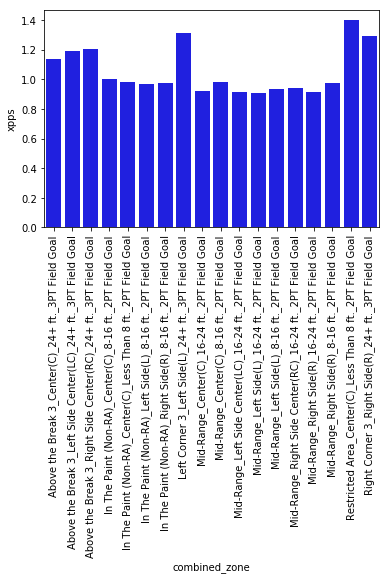

In [101]:
ax = sns.barplot(x="combined_zone", y="xpps", data=league_by_zone, color='blue')
for item in ax.get_xticklabels():
    item.set_rotation(90)

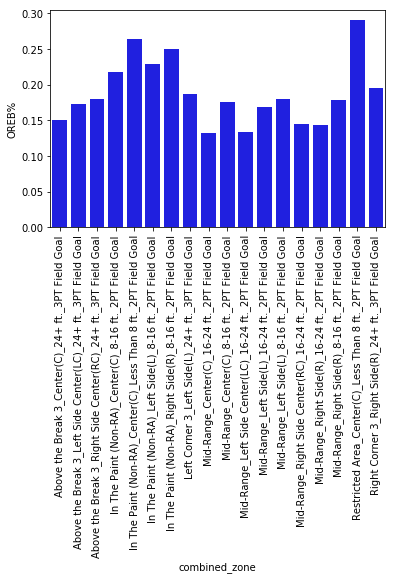

In [102]:
ax = sns.barplot(x="combined_zone", y="OREB%", data=league_by_zone, color='blue')
for item in ax.get_xticklabels():
    item.set_rotation(90)